In [16]:
import pyaudio
import wave

# Constants for audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100  # Sample rate (samples per second)
CHUNK = 1024  # Number of frames per buffer
RECORD_SECONDS = 300  # Maximum recording time in seconds (adjust as needed)
OUTPUT_FILENAME = "recorded_audio.wav"

audio = pyaudio.PyAudio()

# Create an audio stream
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

print("Recording... Press Ctrl+C to stop.")

frames = []

try:
    while True:
        data = stream.read(CHUNK)
        frames.append(data)
except KeyboardInterrupt:
    print("Recording stopped.")

# Close and terminate the audio stream
stream.stop_stream()
stream.close()
audio.terminate()

Recording... Press Ctrl+C to stop.
Recording stopped.


C:\Users\bsshu\AppData\Local\Temp\ipykernel_37428\3624687417.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max),


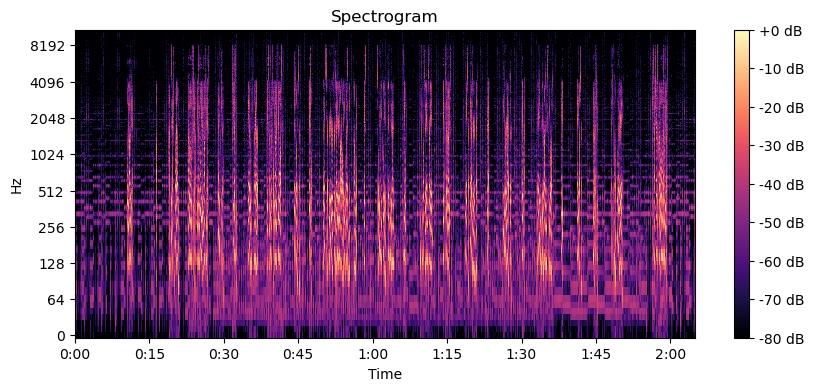

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Create and display a spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max),
                         y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [3]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import pydub.playback as playback

# Load the recorded audio file
audio = AudioSegment.from_wav("recorded_audio.wav")

# Define the minimum length of silence (in milliseconds) to consider as a content break
min_silence_length = 1000  # Adjust as needed

# Split the audio based on silence
content_segments = split_on_silence(audio, min_silence_len=min_silence_length, silence_thresh=-40) # Adjust silence threshold as needed

# Play each content segment and export it as a separate audio file
for i, segment in enumerate(content_segments):
    print(f"Playing Content {i + 1}")
    playback.play(segment)
    segment.export(f"content_{i}.wav", format="wav")

print("Audio content separated and saved as individual files.")

C:\Users\bsshu\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Playing Content 1
Playing Content 2
Playing Content 3
Playing Content 4
Playing Content 5
Playing Content 6
Playing Content 7
Playing Content 8
Playing Content 9
Playing Content 10
Playing Content 11
Playing Content 12
Playing Content 13
Playing Content 14
Playing Content 15
Playing Content 16
Playing Content 17
Playing Content 18
Playing Content 19
Playing Content 20
Playing Content 21
Playing Content 22
Playing Content 23
Playing Content 24
Playing Content 25
Playing Content 26
Audio content separated and saved as individual files.


In [4]:
import speech_recognition as sr
import os

# Initialize the recognizer
recognizer = sr.Recognizer()

# Iterate over the separated audio segments
for i in range(len(content_segments)):
    audio_file_path = f"content_{i}.wav"
    
    # Load the audio file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
    
    try:
        # Use the Google Web Speech API to transcribe the audio
        text = recognizer.recognize_google(audio_data)
        print(f"Content {i + 1} Transcript: {text}")
    except sr.UnknownValueError:
        print(f"Content {i + 1} - Google Web Speech API could not understand audio.")
    except sr.RequestError as e:
        print(f"Content {i + 1} - Could not request results from Google Web Speech API; {e}")

print("Audio content transcribed.")

Content 1 Transcript: calling customer
Content 2 - Google Web Speech API could not understand audio.
Content 3 Transcript: hi this is Ashwin how can I help you
Content 4 Transcript: I have a virtual refrigerator it has some cooling issue in the past few
Content 5 Transcript: when did you purchase
Content 6 Transcript: 2017
Content 7 Transcript: may I know the registered contact number
Content 8 Transcript: yes 974812 345
Content 9 Transcript: just a moment
Content 10 Transcript: yeah
Content 11 Transcript: am I
Content 12 - Google Web Speech API could not understand audio.
Content 13 Transcript: so you are having a cooling issue since when is this happen
Content 14 Transcript: it's been
Content 15 - Google Web Speech API could not understand audio.
Content 16 - Google Web Speech API could not understand audio.
Content 17 Transcript: ok sir I am registering your
Content 18 - Google Web Speech API could not understand audio.
Content 19 Transcript: please confirm your address
Content 20 -

In [5]:
import speech_recognition as sr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import os

# Initialize the recognizer
recognizer = sr.Recognizer()

# Download NLTK data for tokenization and stop words
nltk.download("punkt")
nltk.download("stopwords")

# Load NLTK stop words
stop_words = set(stopwords.words("english"))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Iterate over the separated audio segments
for i in range(len(content_segments)):
    audio_file_path = f"content_{i}.wav"

    # Load the audio file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)

    try:
        # Use the Google Web Speech API to transcribe the audio
        text = recognizer.recognize_google(audio_data)

        # Tokenize the transcribed text
        tokens = word_tokenize(text)

        # Remove stop words and perform stemming
        filtered_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]
        
        # Reconstruct the text from stemmed tokens
        stemmed_text = " ".join(filtered_tokens)
        print(f"Content {i + 1} Stemmed Text: {stemmed_text}")
    except sr.UnknownValueError:
        print(f"Content {i + 1} - Google Web Speech API could not understand audio.")
    except sr.RequestError as e:
        print(f"Content {i + 1} - Could not request results from Google Web Speech API; {e}")

print("Stemming complete.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Content 1 Stemmed Text: call custom
Content 2 - Google Web Speech API could not understand audio.
Content 3 Stemmed Text: hi ashwin help
Content 4 Stemmed Text: virtual refriger cool issu past
Content 5 Stemmed Text: purchas
Content 6 Stemmed Text: 2017
Content 7 Stemmed Text: may know regist contact number
Content 8 Stemmed Text: ye 974812 345
Content 9 Stemmed Text: moment
Content 10 Stemmed Text: yeah
Content 11 Stemmed Text: 
Content 12 - Google Web Speech API could not understand audio.
Content 13 Stemmed Text: cool issu sinc happen
Content 14 Stemmed Text: 's
Content 15 - Google Web Speech API could not understand audio.
Content 16 - Google Web Speech API could not understand audio.
Content 17 Stemmed Text: ok sir regist
Content 18 - Google Web Speech API could not understand audio.
Content 19 Stemmed Text: pleas confirm address
Content 20 - Google Web Speech API could not understand audio.
Content 21 Stemmed Text: recognit visit hous next 24
Content 22 Stemmed Text: thank
Conten

In [7]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   --------- ------------------------------ 143.4/626.3 kB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 2.1 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.2 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import speech_recognition as sr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import os

# Initialize the recognizer
recognizer = sr.Recognizer()

# Download NLTK data for tokenization and stop words
nltk.download("punkt")
nltk.download("stopwords")

# Load NLTK stop words
stop_words = set(stopwords.words("english"))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Iterate over the separated audio segments
for i in range(len(content_segments)):
    audio_file_path = f"content_{i}.wav"

    # Load the audio file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)

    try:
        # Use the Google Web Speech API to transcribe the audio
        text = recognizer.recognize_google(audio_data)

        # Tokenize the transcribed text
        tokens = word_tokenize(text)

        # Remove stop words and perform stemming
        filtered_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]

        # Reconstruct the text from stemmed tokens
        stemmed_text = " ".join(filtered_tokens)

        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(stemmed_text)
        sentiment = analysis.sentiment

        print(f"Content {i + 1} Stemmed Text: {stemmed_text}")
        print(f"Content {i + 1} Sentiment: Polarity = {sentiment.polarity}, Subjectivity = {sentiment.subjectivity}")
    except sr.UnknownValueError:
        print(f"Content {i + 1} - Google Web Speech API could not understand audio.")
    except sr.RequestError as e:
        print(f"Content {i + 1} - Could not request results from Google Web Speech API; {e}")

print("Sentiment analysis complete.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Content 1 Stemmed Text: call custom
Content 1 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 2 - Google Web Speech API could not understand audio.
Content 3 Stemmed Text: hi ashwin help
Content 3 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 4 Stemmed Text: virtual refriger cool issu past
Content 4 Sentiment: Polarity = 0.04999999999999999, Subjectivity = 0.45
Content 5 Stemmed Text: purchas
Content 5 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 6 Stemmed Text: 2017
Content 6 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 7 Stemmed Text: may know regist contact number
Content 7 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 8 Stemmed Text: ye 974812 345
Content 8 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 9 Stemmed Text: moment
Content 9 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 10 Stemmed Text: yeah
Content 10 Sentiment: Polarity = 0.0, Subjectivity = 0.0
Content 11 Stemmed Text: 
Content 11 Sentiment: Polarity = 0.0, Subjec

In [15]:
import speech_recognition as sr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import os
import matplotlib.pyplot as plt

# Initialize the recognizer
recognizer = sr.Recognizer()


# Load NLTK stop words
stop_words = set(stopwords.words("english"))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Initialize counters for sentiment classification
positive_count = 0
negative_count = 0
neutral_count = 0

# Lists to store sentiment labels for each content segment
sentiment_labels = []

# Iterate over the separated audio segments
for i in range(len(content_segments)):
    audio_file_path = f"content_{i}.wav"

    # Load the audio file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)

    try:
        # Use the Google Web Speech API to transcribe the audio
        text = recognizer.recognize_google(audio_data)

        # Tokenize the transcribed text
        tokens = word_tokenize(text)

        # Remove stop words and perform stemming
        filtered_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]

        # Reconstruct the text from stemmed tokens
        stemmed_text = " ".join(filtered_tokens)

        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(stemmed_text)
        sentiment = analysis.sentiment

        # Classify sentiment as positive, negative, or neutral
        if sentiment.polarity > 0.1:
            sentiment_label = "Positive"
            positive_count += 1
        elif sentiment.polarity < -0.1:
            sentiment_label = "Negative"
            negative_count += 1
        else:
            sentiment_label = "Neutral"
            neutral_count += 1

        sentiment_labels.append(sentiment_label)

        print(f"Content {i + 1} Stemmed Text: {stemmed_text}")
        print(f"Content {i + 1} Sentiment: Polarity = {sentiment.polarity:.2f}, Subjectivity = {sentiment.subjectivity:.2f}")
        print(f"Content {i + 1} Sentiment Classification: {sentiment_label}\n")
    except sr.UnknownValueError:
        print(f"Content {i + 1} - Google Web Speech API could not understand audio.")
    except sr.RequestError as e:
        print(f"Content {i + 1} - Could not request results from Google Web Speech API; {e}")


Content 1 Stemmed Text: call custom
Content 1 Sentiment: Polarity = 0.00, Subjectivity = 0.00
Content 1 Sentiment Classification: Neutral

Content 2 - Google Web Speech API could not understand audio.
Content 3 Stemmed Text: hi ashwin help
Content 3 Sentiment: Polarity = 0.00, Subjectivity = 0.00
Content 3 Sentiment Classification: Neutral

Content 4 Stemmed Text: virtual refriger cool issu past
Content 4 Sentiment: Polarity = 0.05, Subjectivity = 0.45
Content 4 Sentiment Classification: Neutral

Content 5 Stemmed Text: purchas
Content 5 Sentiment: Polarity = 0.00, Subjectivity = 0.00
Content 5 Sentiment Classification: Neutral

Content 6 Stemmed Text: 2017
Content 6 Sentiment: Polarity = 0.00, Subjectivity = 0.00
Content 6 Sentiment Classification: Neutral

Content 7 Stemmed Text: may know regist contact number
Content 7 Sentiment: Polarity = 0.00, Subjectivity = 0.00
Content 7 Sentiment Classification: Neutral

Content 8 Stemmed Text: ye 974812 345
Content 8 Sentiment: Polarity = 0.0

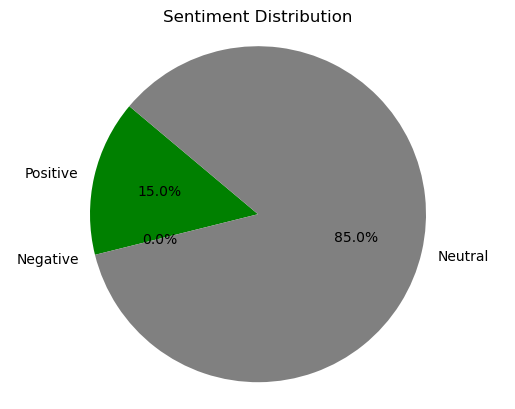

Sentiment analysis and visualization complete.


In [14]:
# Create a pie chart to represent sentiment distribution
labels = ["Positive", "Negative", "Neutral"]
sizes = [positive_count, negative_count, neutral_count]
colors = ["green", "red", "gray"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Distribution")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Sentiment analysis and visualization complete.")